In [1]:
df = pd.read_excel('C:/Users/park/Desktop/실증분 9월팀/file.xlsx')

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import scipy.stats as stats
from scipy.stats import probplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import jarque_bera
#import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline 

In [3]:
df

,CLOCK,RAM,STOR,PW,CPU_AMD,CPU_INT,GEN_RY3_1,GEN_RY3_2,GEN_RY5_PRO_3,GEN_RY5_3,...,GP_GP_GTX_1650_SU,GP_GP_GTX_1660,GP_GP_GTX_1660_SU,GP_GP_RTX_2060,GP_GP_RTX_2060_SU,GP_GP_RTX_2070,GP_GP_RTX_2070_SU,WIN_UNCOV,WIN10,PRICE
0,3.6,8,240,500,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,669000
1,3.6,8,240,500,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,393750
2,3.6,16,256,600,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,840000
3,2.9,16,256,600,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,796910
4,2.9,8,240,500,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,738990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,3.6,16,500,700,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1468990
16943,2.9,8,120,500,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,628990
16944,2.9,16,512,500,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1445000
16945,2.9,16,500,600,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1010000


In [4]:
"""
try: 
    print( df['CLOCK'] )
except KeyError:
    print( 'CLOCK is none!' ) 
"""

"\ntry: \n    print( df['CLOCK'] )\nexcept KeyError:\n    print( 'CLOCK is none!' ) \n"

In [5]:
df['CLOCK'] = df['CLOCK'] * 10

In [6]:
df['CLOCK'] = df['CLOCK'].astype(int)

In [7]:
X_d = df[['CLOCK', 'RAM', 'STOR', 'PW',]]

In [8]:
X_d = X_d.astype(str)

In [9]:
X_d = pd.get_dummies(X_d[['CLOCK', 'RAM', 'STOR', 'PW',]])

In [10]:
df = df.drop(["CLOCK", "RAM", "STOR", "PW"], axis = 1)

In [11]:
df =  pd.concat([X_d, df],axis=1)

In [12]:
df_Y = pd.DataFrame(df["PRICE"])

In [13]:
df_X = df.drop("PRICE", axis = 1)

In [14]:
df_X = pd.DataFrame(df_X)

In [15]:
def minmax_scaling(data):
    min_max_scaler = MinMaxScaler()
    mm_scale = min_max_scaler.fit_transform(data)
    mm_scale = pd.DataFrame(mm_scale, columns = data.columns, index=list(data.index.values))
    return mm_scale

In [16]:
def standard_scaling(data):    # 스탠다드 스케일링
    std_scaler = StandardScaler()
    std_scale = std_scaler.fit_transform(data)
    std_scale = pd.DataFrame(std_scale, columns = data.columns, index=list(data.index.values))
    return std_scale

In [17]:
var = [c for c in df_X]

In [18]:
chunk = "+".join(var)
chunk = chunk[0:]

In [19]:
chunk

'CLOCK_29+CLOCK_35+CLOCK_36+CLOCK_37+CLOCK_38+RAM_16+RAM_4+RAM_8+STOR_120+STOR_240+STOR_250+STOR_256+STOR_500+STOR_512+PW_500+PW_600+PW_700+CPU_AMD+CPU_INT+GEN_RY3_1+GEN_RY3_2+GEN_RY5_PRO_3+GEN_RY5_3+GEN_RY7_3+GEN_ATH+GEN_CORi3_9+GEN_CORi5_10+GEN_CORi5_9+GEN_CORi7_10+CODE_RAVEN+CODE_RENO+CODE_MATI+CODE_COFFEE_R+CODE_COMMET_S+CODE_PICA+USE_GAME+USE_GAME_GRAP+USE_OFFICE+MAIN_AMD_A320+MAIN_AMD_A520+MAIN_AMD_B450+MAIN_INT_B460+MAIN_INT_H310+MAIN_INT_H370+MAIN_INT_H410+MAIN_INT_Z490+GP_RADE_RX_550+GP_RADE_Vega_3+GP_RADE_Vega_7+GP_RADE_Vega_8+GP_GP_GTX_1650_SU+GP_GP_GTX_1660+GP_GP_GTX_1660_SU+GP_GP_RTX_2060+GP_GP_RTX_2060_SU+GP_GP_RTX_2070+GP_GP_RTX_2070_SU+WIN_UNCOV+WIN10'

In [20]:
df_reg = pd.concat([df_Y, df_X], axis = 1)

In [21]:
# +GEN_RY3_2+GEN_RY5_PRO_3+GEN_RY5_3+GEN_RY7_3+GEN_ATH+GEN_CORi3_9+GEN_CORi5_10+GEN_CORi5_9+GEN_CORi7_10+CODE_RENO+CODE_MATI+CODE_COFFEE_R+CODE_COMMET_S+CODE_PICA+MAIN_AMD_A520+MAIN_AMD_B450+MAIN_INT_B460+MAIN_INT_H310+MAIN_INT_H370+MAIN_INT_H410+MAIN_INT_Z490

In [22]:
#+CODE_RENO+CODE_MATI+CODE_COFFEE_R+CODE_COMMET_S+CODE_PICA+

In [23]:
df_reg

,PRICE,CLOCK_29,CLOCK_35,CLOCK_36,CLOCK_37,CLOCK_38,RAM_16,RAM_4,RAM_8,STOR_120,...,GP_RADE_Vega_8,GP_GP_GTX_1650_SU,GP_GP_GTX_1660,GP_GP_GTX_1660_SU,GP_GP_RTX_2060,GP_GP_RTX_2060_SU,GP_GP_RTX_2070,GP_GP_RTX_2070_SU,WIN_UNCOV,WIN10
0,669000,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,393750,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,840000,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,796910,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,738990,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,1468990,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
16943,628990,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
16944,1445000,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
16945,1010000,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


베이스라인: 클럭:2.9, 램:4, 용량:120, 파워:500, 시퓨:암드, 세대: 라이젠3-1, 프로세서: 레이븐릿지, 용도: 게임용, 메인보드: 암드 A320, 그래픽카드: 라데온 RX 550, 운영체제: 미포함

In [25]:
model2 = smf.ols("PRICE ~ CLOCK_35+CLOCK_36+CLOCK_37+CLOCK_38+RAM_8+RAM_16+STOR_240+STOR_250+STOR_256+STOR_500+STOR_512+PW_600+PW_700+CPU_INT++GEN_RY3_2+GEN_RY5_PRO_3+GEN_RY5_3+GEN_RY7_3+GEN_ATH+GEN_CORi3_9+GEN_CORi5_10+GEN_CORi5_9+GEN_CORi7_10+CODE_RENO+CODE_MATI+CODE_COFFEE_R+CODE_COMMET_S+CODE_PICA+MAIN_AMD_A520+MAIN_AMD_B450+MAIN_INT_B460+MAIN_INT_H310+MAIN_INT_H370+MAIN_INT_H410+MAIN_INT_Z490+USE_GAME_GRAP+USE_OFFICE+GP_RADE_Vega_3+GP_RADE_Vega_7+GP_RADE_Vega_8+GP_GP_GTX_1650_SU+GP_GP_GTX_1660+GP_GP_GTX_1660_SU+GP_GP_RTX_2060+GP_GP_RTX_2060_SU+GP_GP_RTX_2070+GP_GP_RTX_2070_SU+WIN10" , data=df_reg)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.529e+06
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:11:09   Log-Likelihood:            -1.8034e+05
No. Observations:               16947   AIC:                         3.607e+05
Df Residuals:                   16929   BIC:                         3.609e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           1.11e+12    2.4e+1

베이스라인: 클럭:2.9, 램:4, 용량:120, 파워:500, 시퓨:암드, 세대: 라이젠3-1, 프로세서: 레이븐릿지, 용도: 게임용, 그래픽카드: 라데온 RX 550, 운영체제: 미포함

In [26]:
model1 = smf.ols("PRICE ~ CLOCK_35+CLOCK_36+CLOCK_37+CLOCK_38+RAM_8+RAM_16+STOR_240+STOR_250+STOR_256+STOR_500+STOR_512+PW_600+PW_700+CPU_INT++GEN_RY3_2+GEN_RY5_PRO_3+GEN_RY5_3+GEN_RY7_3+GEN_ATH+GEN_CORi3_9+GEN_CORi5_10+GEN_CORi5_9+GEN_CORi7_10+CODE_RENO+CODE_MATI+CODE_COFFEE_R+CODE_COMMET_S+CODE_PICA+USE_GAME_GRAP+USE_OFFICE+GP_RADE_Vega_3+GP_RADE_Vega_7+GP_RADE_Vega_8+GP_GP_GTX_1650_SU+GP_GP_GTX_1660+GP_GP_GTX_1660_SU+GP_GP_RTX_2060+GP_GP_RTX_2060_SU+GP_GP_RTX_2070+GP_GP_RTX_2070_SU+WIN10" , data=df_reg)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.511e+05
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:11:09   Log-Likelihood:            -1.8898e+05
No. Observations:               16947   AIC:                         3.780e+05
Df Residuals:                   16929   BIC:                         3.781e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.393e+16   3.94e+1

(array([1994.,    0.,    0.,    0.,  997.,    0.,    0.,    0.,  997.,
           0.,    0.,  997.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  997.,    0.,  997.,  997.,    0.,
         996.,    0.,    0.,  997.,    0.,    0.,    0.,    0.,  996.,
           0.,    0.,  997.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  997.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  997.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  997.,    0.,  997.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         997.]),
 array([ 338070.,  351035.,  364000.,  376965.,  389930.,  402895.,
         415860.,  428825.,  441790.,  454755.,  467720.,  480685.,
         493650.,  506615.,  519580.,  532545.,  545510.,  558475.

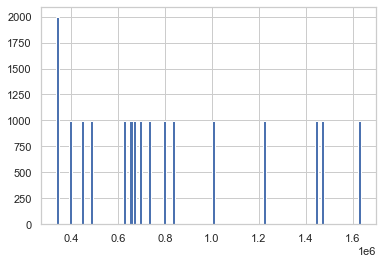

In [27]:
plt.hist(df['PRICE'], 100)

# 이 윗 부분까지 실행하세요

In [28]:
"""model1 = sm.OLS.from_formula("PRICE ~ CLOCK+RAM+STOR+PW+CPU_AMD+CPU_INT+CODE_RY3_1+\
                             CODE_RY3_2 + CODE_RY5_PRO_3 + CODE_RY7_3 + CODE_ATH + CODE_CORi5_10", data=df)
result1 = model1.fit()
print(result1.summary())
"""

'model1 = sm.OLS.from_formula("PRICE ~ CLOCK+RAM+STOR+PW+CPU_AMD+CPU_INT+CODE_RY3_1+                             CODE_RY3_2 + CODE_RY5_PRO_3 + CODE_RY7_3 + CODE_ATH + CODE_CORi5_10", data=df)\nresult1 = model1.fit()\nprint(result1.summary())\n'

In [29]:
def qqplot_shapiro_test(df):   # 샤피로 테스트 >>> 정규성 검정
    model = sm.OLS.from_formula("PRICE ~ " + "+".join(var), data=df)
    resid = model.fit().resid
    plt.figure()
    probplot(resid, plot=plt)
    plt.show()
    print(stats.shapiro(resid))

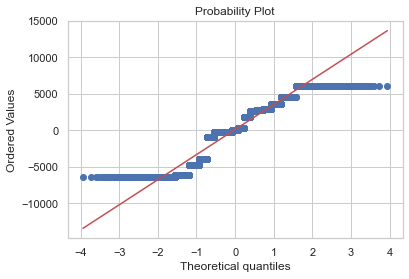

ShapiroResult(statistic=0.9290765523910522, pvalue=0.0)


In [30]:
qqplot_shapiro_test(df_reg)

In [32]:
resid = model1.fit().resid

(array([1993.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  997.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  997.,    0.,    0.,    0.,
         997.,    0.,    0., 1994.,    0.,  997.,    0.,    0.,    0.,
           0.,    0.,    0.,  997.,    0.,  997.,    0.,  996.,    0.,
           0., 1994.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,  997.,    0.,    0.,    0.,    0.,    0.,    0.,
         997.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  997.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         997.]),
 array([-26990. , -26296.6, -25603.2, -24909.8, -24216.4, -23523. ,
        -22829.6, -22136.2, -21442.8, -20749.4, -20056. , -19362.6,
        -18669.2, -17975.8, -17282.4, -16589. , -15895.6, -15202.2

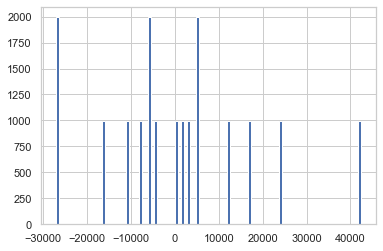

In [38]:
plt.hist(resid, bins = 100)

In [ ]:
df_reg.to_csv('regfile.csv', index = False)

In [ ]:
sp.stats.probplot(result1.resid, plot=plt)
plt.show()

In [ ]:
test = sm.stats.omni_normtest(result1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [ ]:
def VIF_test(df):    # VIF >>> 다중공선성 확인
    y, X = dmatrices("PRICE ~ " + "+".join(var), data = df, return_type = 'dataframe')
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns 
    return vif.round(1)